# DNMT3A

## Plot mean value and variance of groove widths


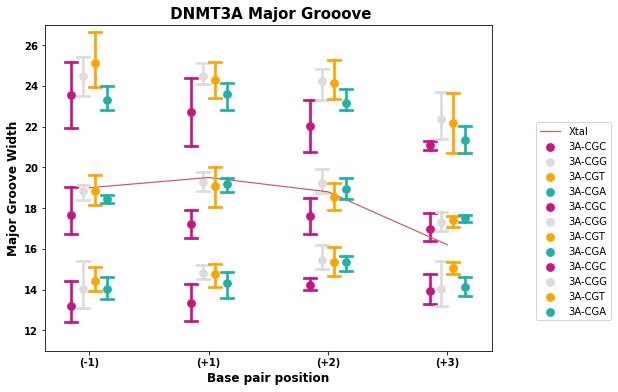

In [53]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import shutil
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import csv

input_files = os.path.join('DNMT3A_inputs')


a=pd.read_csv(input_files+"/3A-CGG_gw_max_min", sep=";")
b=pd.read_csv(input_files+"/3A-CGC_gw_max_min", sep=";")
c=pd.read_csv(input_files+"/3A-CGT_gw_max_min", sep=";")
d=pd.read_csv(input_files+"/3A-CGA_gw_max_min", sep=";")

#xtal structure's groove width values
e=pd.read_csv(input_files+"/3a-ref.out_groove_width.csv", sep=";") 

a=a.sort_values(('index') , ascending=False)
b=b.sort_values(('index') , ascending=False)
c=c.sort_values(('index') , ascending=False)
d=d.sort_values(('index') , ascending=False)
e=e.sort_values(('index') , ascending=False)

a['Type'] = '3A-CGG'
b['Type'] = '3A-CGC'
c['Type'] = '3A-CGT'
d['Type'] = '3A-CGA'

result = pd.concat([b, a, c, d])

result['index'] = result['index'].astype(str).str.replace('3','(+3)')
result['index'] = result['index'].astype(str).str.replace('4','(+2)') 
result['index'] = result['index'].astype(str).str.replace('5','(+1)') 
result['index'] = result['index'].astype(str).str.replace('6','(-1)') 

e['index'] = e['index'].astype(str).str.replace('3','(+3)')
e['index'] = e['index'].astype(str).str.replace('4','(+2)') 
e['index'] = e['index'].astype(str).str.replace('5','(+1)') 
e['index'] = e['index'].astype(str).str.replace('6','(-1)') 

plt.figure(figsize=(8,6))

palet ={"3A-CGC": "#C71585", "3A-CGG": "#DCDCDC", "3A-CGT": "orange", "3A-CGA": "lightseagreen"}

sns.pointplot(x="index", y="major_max", linewidth=0.1, palette=palet, hue='Type', data=result, dodge=0.3,capsize=.1, join=False) #max
sns.pointplot(x="index", y="major_min", linewidth=0.1, palette=palet, hue='Type', data=result, dodge=0.3, capsize=.1,join=False) #min
sns.pointplot(x="index", y="major_mean", linewidth=0.1,palette=palet,dodge=0.3,join=False, hue='Type',capsize=.1, data=result) #mean
sns.lineplot(x="index", y="major", label='Xtal', linewidth=1.2,color='#cd5c5c', data=e, sort=False) #xtal


plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.ylim(ymax = 27, ymin = 11)
plt.xlabel('Base pair position', fontsize=12, fontweight='bold')
plt.ylabel('Major Groove Width', fontsize=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1.1, 0.7),  borderaxespad=0.)
plt.title(" DNMT3A Major Grooove",fontsize=15, fontweight='bold')

plt.savefig("3a-major_groove.pdf", dpi=600, bbox_inches = "tight",format="pdf")


## Plot mean value and variance of base pair parameters


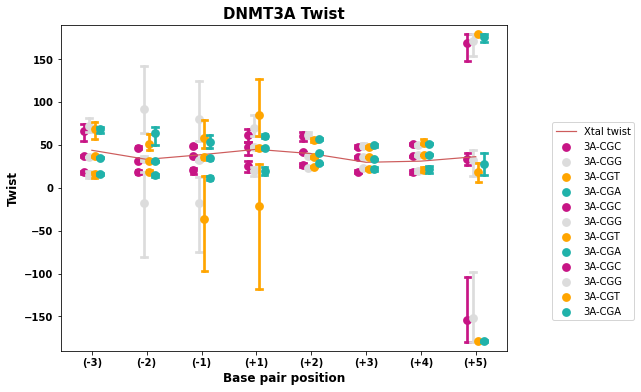

In [49]:
# Plots the calculated max and min base pair step values and the Xtal base pair step values

import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import shutil
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import csv

input_files = os.path.join('DNMT3A_inputs')

a=pd.read_csv(input_files+"/3A-CGG_bps_max_min", sep=";")
b=pd.read_csv(input_files+"/3A-CGC_bps_max_min", sep=";")
c=pd.read_csv(input_files+"/3A-CGT_bps_max_min", sep=";")
d=pd.read_csv(input_files+"/3A-CGA_bps_max_min", sep=";")

#xtal structure's base pair parameters
e=pd.read_csv(input_files+"/3a-refbps_merged.csv", sep=";") 

#define base step pair parameter depending on what you want to plot
bps = "twist"

###########

a=a.sort_values(('index') , ascending=False)
b=b.sort_values(('index') , ascending=False)
c=c.sort_values(('index') , ascending=False)
d=d.sort_values(('index') , ascending=False)
e=e.sort_values(('index') , ascending=False)

a['Type'] = '3A-CGG'
b['Type'] = '3A-CGC'
c['Type'] = '3A-CGT'
d['Type'] = '3A-CGA'

a['index'] = a['index'].astype(str) 
b['index'] = b['index'].astype(str) 
c['index'] = c['index'].astype(str) 
d['index'] = d['index'].astype(str) 
e['index'] = e['index'].astype(str) 

result = pd.concat([b, a, c, d])

result['index'] = result['index'].replace({'1':'(+5)', 
                                     '2':'(+4)',
                                     '3':'(+3)',
                                     '4':'(+2)',
                                     '5':'(+1)',
                                     '6':'(-1)',
                                     '7':'(-2)',
                                     '8':'(-3)',
                                     '9':'(-4)'})
e['index'] = e['index'].replace({'1':'(+5)', 
                                     '2':'(+4)',
                                     '3':'(+3)',
                                     '4':'(+2)',
                                     '5':'(+1)',
                                     '6':'(-1)',
                                     '7':'(-2)',
                                     '8':'(-3)',
                                     '9':'(-4)'})

plt.figure(figsize=(8,6))

palet ={"3A-CGC": "#C71585", "3A-CGG": "#DCDCDC", "3A-CGT": "orange", "3A-CGA": "lightseagreen"}

sns.pointplot(x="index", y=bps+"_max", linewidth=0.1, palette=palet, hue='Type', data=result, dodge=0.3,capsize=.1, join=False) #max
sns.pointplot(x="index", y=bps+"_min", linewidth=0.1, palette=palet, hue='Type', data=result, dodge=0.3, capsize=.1,join=False) #min
sns.pointplot(x="index", y=bps+"_mean", linewidth=0.1,palette=palet,dodge=0.3,join=False, hue='Type',capsize=.1, data=result) #mean
sns.lineplot(x="index", y=bps, label='Xtal '+bps, linewidth=1.2,color='#cd5c5c',sort=False, data=e) #xtal

plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

##shift, slide: 7,-7
#plt.ylim(ymax = 7, ymin = -7)

##rise: 9,-5
#plt.ylim(ymax = 9, ymin = -5)

##tilt: 175,-175
#plt.ylim(ymax = 175, ymin = -175)

##roll: 190, -190##twist: 190,-190
plt.ylim(ymax = 190, ymin = -190)

plt.xlabel('Base pair position', fontsize=12, fontweight='bold')
plt.ylabel(bps.capitalize(), fontsize=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1.1, 0.7),  borderaxespad=0.)
plt.title("DNMT3A "+ bps.capitalize(),fontsize=15, fontweight='bold')

plt.savefig("3a-"+bps+".pdf", dpi=600, bbox_inches = "tight",format="pdf")


# DNMT3B

## Plot mean value and variance of groove widths

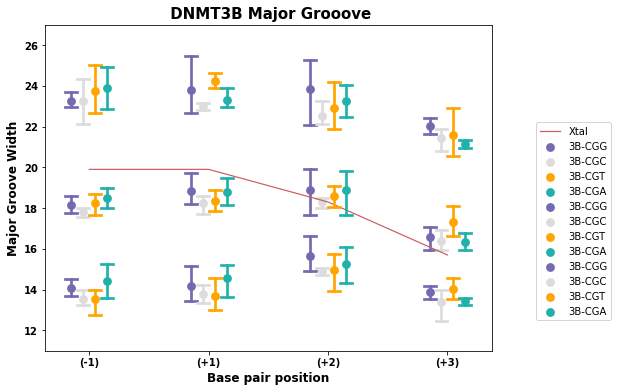

In [39]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import shutil
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import csv

input_files = os.path.join('DNMT3B_inputs')


a=pd.read_csv(input_files+"/3B-CGG_gw_max_min", sep=";")
b=pd.read_csv(input_files+"/3B-CGC_gw_max_min", sep=";")
c=pd.read_csv(input_files+"/3B-CGT_gw_max_min", sep=";")
d=pd.read_csv(input_files+"/3B-CGA_gw_max_min", sep=";")

#xtal structure's base pair parameters
e=pd.read_csv(input_files+"/3b-ref.out_groove_width.csv", sep=";") 

a=a.sort_values(('index') , ascending=False)
b=b.sort_values(('index') , ascending=False)
c=c.sort_values(('index') , ascending=False)
d=d.sort_values(('index') , ascending=False)
e=e.sort_values(('index') , ascending=False)

a['Type'] = '3B-CGG'
b['Type'] = '3B-CGC'
c['Type'] = '3B-CGT'
d['Type'] = '3B-CGA'

result = pd.concat([a, b, c, d])

result['index'] = result['index'].astype(str).str.replace('3','(+3)')
result['index'] = result['index'].astype(str).str.replace('4','(+2)') 
result['index'] = result['index'].astype(str).str.replace('5','(+1)') 
result['index'] = result['index'].astype(str).str.replace('6','(-1)') 

e['index'] = e['index'].astype(str).str.replace('3','(+3)')
e['index'] = e['index'].astype(str).str.replace('4','(+2)') 
e['index'] = e['index'].astype(str).str.replace('5','(+1)') 
e['index'] = e['index'].astype(str).str.replace('6','(-1)') 


plt.figure(figsize=(8,6))

palet ={"3B-CGG": "#746AB0", "3B-CGC": "#DCDCDC", "3B-CGT": "orange", "3B-CGA": "lightseagreen"}

sns.pointplot(x="index", y="major_max", linewidth=0.1, palette=palet, hue='Type', data=result, dodge=0.3,capsize=.1, join=False) #max
sns.pointplot(x="index", y="major_min", linewidth=0.1, palette=palet, hue='Type', data=result, dodge=0.3, capsize=.1,join=False) #min
sns.pointplot(x="index", y="major_mean", linewidth=0.1,palette=palet,dodge=0.3,join=False, hue='Type',capsize=.1, data=result) #mean
sns.lineplot(x="index", y="major", label='Xtal', linewidth=1.2,color='#cd5c5c', data=e, sort=False) #xtal


plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.ylim(ymax = 27, ymin = 11)
plt.xlabel('Base pair position', fontsize=12, fontweight='bold')
plt.ylabel('Major Groove Width', fontsize=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1.1, 0.7),  borderaxespad=0.)
plt.title(" DNMT3B Major Grooove",fontsize=15, fontweight='bold')

plt.savefig("3b-major_groove.pdf", dpi=600, bbox_inches = "tight",format="pdf")


## Plot mean value and variance of base pair parameters


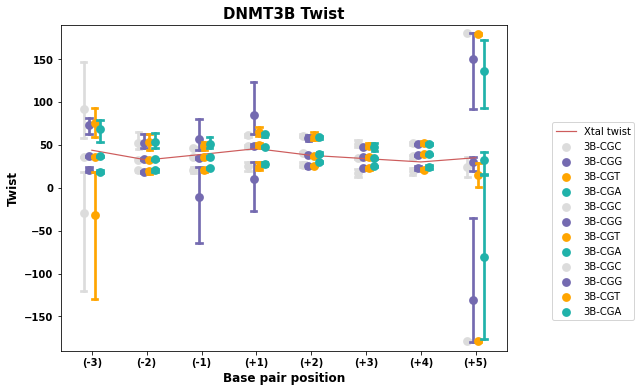

In [50]:
# Plots the calculated max and min base pair step values and the Xtal base pair step values

import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import shutil
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import csv

input_files = os.path.join('DNMT3B_inputs')

a=pd.read_csv(input_files+"/3B-CGG_bps_max_min", sep=";")
b=pd.read_csv(input_files+"/3B-CGC_bps_max_min", sep=";")
c=pd.read_csv(input_files+"/3B-CGT_bps_max_min", sep=";")
d=pd.read_csv(input_files+"/3B-CGA_bps_max_min", sep=";")

#xtal structure's base pair parameters
e=pd.read_csv(input_files+"/3b-refbps_merged.csv", sep=";") 

#define base step pair parameter depending on what you want to plot
bps = "twist"

###########

a=a.sort_values(('index') , ascending=False)
b=b.sort_values(('index') , ascending=False)
c=c.sort_values(('index') , ascending=False)
d=d.sort_values(('index') , ascending=False)
e=e.sort_values(('index') , ascending=False)

a['Type'] = '3B-CGG'
b['Type'] = '3B-CGC'
c['Type'] = '3B-CGT'
d['Type'] = '3B-CGA'

a['index'] = a['index'].astype(str) 
b['index'] = b['index'].astype(str) 
c['index'] = c['index'].astype(str) 
d['index'] = d['index'].astype(str) 
e['index'] = e['index'].astype(str) 

result = pd.concat([b, a, c, d])

result['index'] = result['index'].replace({'1':'(+5)', 
                                     '2':'(+4)',
                                     '3':'(+3)',
                                     '4':'(+2)',
                                     '5':'(+1)',
                                     '6':'(-1)',
                                     '7':'(-2)',
                                     '8':'(-3)',
                                     '9':'(-4)'})
e['index'] = e['index'].replace({'1':'(+5)', 
                                     '2':'(+4)',
                                     '3':'(+3)',
                                     '4':'(+2)',
                                     '5':'(+1)',
                                     '6':'(-1)',
                                     '7':'(-2)',
                                     '8':'(-3)',
                                     '9':'(-4)'})


plt.figure(figsize=(8,6))

palet ={"3B-CGG": "#746AB0", "3B-CGC": "#DCDCDC", "3B-CGT": "orange", "3B-CGA": "lightseagreen"}
#palet ={"3A-CGC": "#C71585", "3A-CGG": "#DCDCDC", "3A-CGT": "orange", "3A-CGA": "lightseagreen"}


sns.pointplot(x="index", y=bps+"_max", linewidth=0.1, palette=palet, hue='Type', data=result, dodge=0.3,capsize=.1, join=False) #max
sns.pointplot(x="index", y=bps+"_min", linewidth=0.1, palette=palet, hue='Type', data=result, dodge=0.3, capsize=.1,join=False) #min
sns.pointplot(x="index", y=bps+"_mean", linewidth=0.1,palette=palet,dodge=0.3,join=False, hue='Type',capsize=.1, data=result) #mean
sns.lineplot(x="index", y=bps, label='Xtal '+bps, linewidth=1.2,color='#cd5c5c', data=e, sort=False) #xtal

plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

##shift, slide: 7,-7
#plt.ylim(ymax = 7, ymin = -7)

##rise: 9,-5
#plt.ylim(ymax = 9, ymin = -5)

##tilt: 175,-175
#plt.ylim(ymax = 175, ymin = -175)

##roll: 190, -190##twist: 190,-190
plt.ylim(ymax = 190, ymin = -190)

plt.xlabel('Base pair position', fontsize=12, fontweight='bold')
plt.ylabel(bps.capitalize(), fontsize=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1.1, 0.7),  borderaxespad=0.)
plt.title("DNMT3B "+ bps.capitalize(),fontsize=15, fontweight='bold')

plt.savefig("3b-"+bps+".pdf", dpi=600, bbox_inches = "tight",format="pdf")
